<a href="https://colab.research.google.com/github/fadillarizalul/thesis-alzheimer/blob/main/thesis_model_confusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
#import data dari drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!wget --no-check-certificate \
https://github.com/fadillarizalul/thesis-alzheimer/raw/main/dataset/3-class-train-valid-test.zip \
  -O 3-class-train-valid-test.zip

--2022-12-23 07:32:04--  https://github.com/fadillarizalul/thesis-alzheimer/raw/main/dataset/3-class-train-valid-test.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fadillarizalul/thesis-alzheimer/main/dataset/3-class-train-valid-test.zip [following]
--2022-12-23 07:32:04--  https://raw.githubusercontent.com/fadillarizalul/thesis-alzheimer/main/dataset/3-class-train-valid-test.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13665913 (13M) [application/zip]
Saving to: ‘3-class-train-valid-test.zip’

3-class-train-valid 100%[===================>]  13.03M  --.-KB/s    in 0.04s   

2022-12-

In [4]:
!unzip /content/3-class-train-valid-test.zip

Archive:  /content/3-class-train-valid-test.zip
   creating: 3-class-train-valid-test/
   creating: 3-class-train-valid-test/test/
   creating: 3-class-train-valid-test/test/AD/
  inflating: 3-class-train-valid-test/test/AD/img-00001-00001.jpg  
  inflating: 3-class-train-valid-test/test/AD/img-00008-00002.jpg  
  inflating: 3-class-train-valid-test/test/AD/img-00008-00003.jpg  
  inflating: 3-class-train-valid-test/test/AD/img-00008-00004.jpg  
  inflating: 3-class-train-valid-test/test/AD/img-00012-00005.jpg  
  inflating: 3-class-train-valid-test/test/AD/img-00013-00001.jpg  
  inflating: 3-class-train-valid-test/test/AD/img-00013-00002.jpg  
  inflating: 3-class-train-valid-test/test/AD/img-00013-00003.jpg  
  inflating: 3-class-train-valid-test/test/AD/img-00013-00004.jpg  
  inflating: 3-class-train-valid-test/test/AD/img-00013-00005.jpg  
  inflating: 3-class-train-valid-test/test/AD/img-00014-00001.jpg  
  inflating: 3-class-train-valid-test/test/AD/img-00014-00002.jpg  
  infl

In [5]:
# re-size all the images to this
IMAGE_SIZE = [256, 256]


In [6]:
train_path="/content/3-class-train-valid-test/train"
test_path="/content/3-class-train-valid-test/test"
val_path="/content/3-class-train-valid-test/valid"

In [7]:
x_train=[]

for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(256,256))
        x_train.append(img_arr)

In [8]:
x_test=[]

for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(256,256))
        x_test.append(img_arr)
    

In [9]:
x_val=[]

for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(256,256))
        x_val.append(img_arr)
    

In [10]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [11]:
train_x.shape,test_x.shape,val_x.shape

((309, 256, 256, 3), (60, 256, 256, 3), (60, 256, 256, 3))

In [12]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'sparse')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'sparse')

val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'sparse')


Found 309 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [15]:
training_set.class_indices

{'AD': 0, 'CN': 1, 'MCI': 2}

In [16]:
train_y=training_set.classes

In [17]:
test_y=test_set.classes

In [18]:
val_y=val_set.classes

In [19]:
train_y.shape,test_y.shape,val_y.shape

((309,), (60,), (60,))

##vgg19

In [20]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [21]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [22]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(3, activation='softmax')(x)

In [23]:
# create a model object
modelvgg = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
modelvgg.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [24]:
# tell the model what cost and optimization method to use
modelvgg.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

#Early stopping to avoid overfitting of model

In [26]:
# fit the model
historyvgg = modelvgg.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=25,
  #callbacks=[early_stop],
  batch_size=16,shuffle=True)

Epoch 1/25
20/20 [==============================] - 14s 264ms/step - loss: 1.5807 - accuracy: 0.3981 - val_loss: 1.4957 - val_accuracy: 0.5167
Epoch 2/25
20/20 [==============================] - 3s 136ms/step - loss: 0.9629 - accuracy: 0.6117 - val_loss: 0.5751 - val_accuracy: 0.7333
Epoch 3/25
20/20 [==============================] - 3s 137ms/step - loss: 0.5222 - accuracy: 0.7896 - val_loss: 0.4905 - val_accuracy: 0.7667
Epoch 4/25
20/20 [==============================] - 3s 137ms/step - loss: 0.3658 - accuracy: 0.8900 - val_loss: 0.2880 - val_accuracy: 0.9667
Epoch 5/25
20/20 [==============================] - 3s 138ms/step - loss: 0.2819 - accuracy: 0.9159 - val_loss: 0.1938 - val_accuracy: 0.9833
Epoch 6/25
20/20 [==============================] - 3s 138ms/step - loss: 0.1717 - accuracy: 0.9903 - val_loss: 0.1928 - val_accuracy: 0.9667
Epoch 7/25
20/20 [==============================] - 3s 138ms/step - loss: 0.1839 - accuracy: 0.9773 - val_loss: 0.2134 - val_accuracy: 0.9333
Epoch

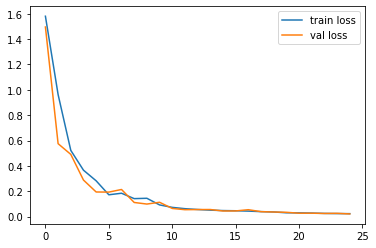

In [29]:
# loss
plt.plot(historyvgg.history['loss'], label='train loss')
plt.plot(historyvgg.history['val_loss'], label='val loss')
plt.legend()

plt.show()

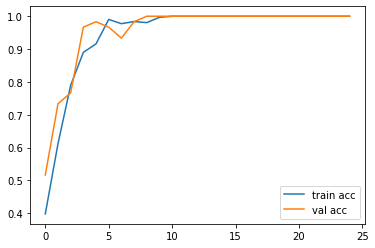

In [30]:
# accuracies
plt.plot(historyvgg.history['accuracy'], label='train acc')
plt.plot(historyvgg.history['val_accuracy'], label='val acc')
plt.legend()

plt.show()

In [31]:
modelvgg.evaluate(test_x,test_y,batch_size=32)

2/2 [==============================] - 7s 3s/step - loss: 0.0206 - accuracy: 1.0000


[0.02063061110675335, 1.0]

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [33]:
y_predvgg=modelvgg.predict(test_x)
y_predvgg=np.argmax(y_predvgg,axis=1)

2/2 [==============================] - 0s 234ms/step


In [34]:
accuracy_score(y_predvgg,test_y)

1.0

In [35]:
print(classification_report(y_predvgg,test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [36]:
confusion_matrix(y_predvgg,test_y)

array([[20,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 20]])

##resnet50

In [37]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape=IMAGE_SIZE + [3])

94765736/94765736 [==============================] - 1s 0us/step


In [38]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [39]:
base_model.trainable = False

In [40]:
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import tensorflow.keras.backend as K

In [41]:
head = base_model.output

head = MaxPooling2D(pool_size=(4,4))(head)
head = Flatten(name='Flatten')(head)

# head = Dense(128, activation='elu')(head)
# head = Dropout(0.3)(head)

head = Dense(256, activation='elu')(head)
head = Dropout(0.3)(head)

head = Dense(3, activation='softmax')(head)

modelresnet = Model(base_model.input, head)

In [42]:
modelresnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [43]:
# tell the model what cost and optimization method to use
modelresnet.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [44]:
# fit the model
historyresnet = modelresnet.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=25,
  #callbacks=[early_stop],
  batch_size=16,shuffle=True)

Epoch 1/25
20/20 [==============================] - 11s 247ms/step - loss: 5.4461 - accuracy: 0.3625 - val_loss: 1.1637 - val_accuracy: 0.3833
Epoch 2/25
20/20 [==============================] - 2s 82ms/step - loss: 1.8025 - accuracy: 0.3463 - val_loss: 1.2164 - val_accuracy: 0.3500
Epoch 3/25
20/20 [==============================] - 2s 91ms/step - loss: 1.5298 - accuracy: 0.3398 - val_loss: 1.1360 - val_accuracy: 0.3333
Epoch 4/25
20/20 [==============================] - 2s 89ms/step - loss: 1.4409 - accuracy: 0.3430 - val_loss: 1.0925 - val_accuracy: 0.5333
Epoch 5/25
20/20 [==============================] - 2s 87ms/step - loss: 1.4002 - accuracy: 0.3592 - val_loss: 1.1192 - val_accuracy: 0.4500
Epoch 6/25
20/20 [==============================] - 2s 82ms/step - loss: 1.2974 - accuracy: 0.3172 - val_loss: 1.1001 - val_accuracy: 0.5667
Epoch 7/25
20/20 [==============================] - 2s 83ms/step - loss: 1.3333 - accuracy: 0.3074 - val_loss: 1.0663 - val_accuracy: 0.4333
Epoch 8/25


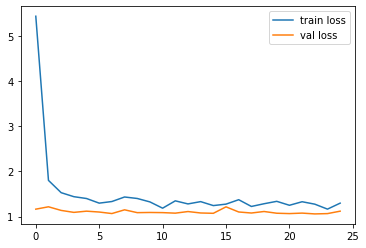

In [47]:
# loss
plt.plot(historyresnet.history['loss'], label='train loss')
plt.plot(historyresnet.history['val_loss'], label='val loss')
plt.legend()

plt.show()

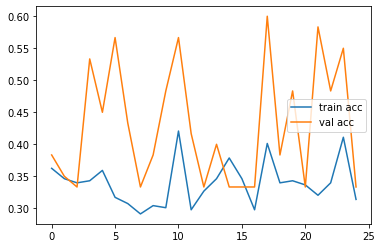

In [48]:
# accuracies
plt.plot(historyresnet.history['accuracy'], label='train acc')
plt.plot(historyresnet.history['val_accuracy'], label='val acc')
plt.legend()

plt.show()

In [49]:
modelresnet.evaluate(test_x,test_y,batch_size=32)

2/2 [==============================] - 2s 887ms/step - loss: 1.1191 - accuracy: 0.3333


[1.1190953254699707, 0.3333333432674408]

In [50]:
y_predresnet=modelresnet.predict(test_x)
y_predresnet=np.argmax(y_predresnet,axis=1)

2/2 [==============================] - 1s 118ms/step


In [51]:
accuracy_score(y_predresnet,test_y)

0.3333333333333333

In [52]:
print(classification_report(y_predresnet,test_y))

              precision    recall  f1-score   support

           0       0.05      1.00      0.10         1
           1       0.00      0.00      0.00         3
           2       0.95      0.34      0.50        56

    accuracy                           0.33        60
   macro avg       0.33      0.45      0.20        60
weighted avg       0.89      0.33      0.47        60



In [53]:
confusion_matrix(y_predresnet,test_y)

array([[ 1,  0,  0],
       [ 2,  0,  1],
       [17, 20, 19]])

#cnn 13

In [54]:
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout, BatchNormalization

model13 = keras.Sequential()

model13.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape = (256, 256, 3), kernel_initializer="he_normal"))
model13.add(layers.MaxPooling2D())
model13.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model13.add(layers.MaxPooling2D())
model13.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model13.add(layers.MaxPooling2D())

model13.add(layers.Flatten())
model13.add(BatchNormalization())
model13.add(layers.Dense(units = 64, activation = 'relu'))
model13.add(layers.Dropout(0.3))
model13.add(layers.Dense(units = 64, activation = 'relu'))
model13.add(layers.Dense(units = 3, activation = 'softmax'))

model13.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

model13.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0

In [55]:
# tell the model what cost and optimization method to use
model13.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [56]:
# fit the model
history13 = model13.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=25,
  #callbacks=[early_stop],
  batch_size=16,shuffle=True)

Epoch 1/25
20/20 [==============================] - 3s 49ms/step - loss: 1.9855 - accuracy: 0.4757 - val_loss: 1.1331 - val_accuracy: 0.3667
Epoch 2/25
20/20 [==============================] - 0s 23ms/step - loss: 0.8417 - accuracy: 0.7152 - val_loss: 0.9568 - val_accuracy: 0.5000
Epoch 3/25
20/20 [==============================] - 0s 23ms/step - loss: 0.8254 - accuracy: 0.7799 - val_loss: 0.8890 - val_accuracy: 0.5500
Epoch 4/25
20/20 [==============================] - 0s 23ms/step - loss: 0.8362 - accuracy: 0.7443 - val_loss: 0.9592 - val_accuracy: 0.6500
Epoch 5/25
20/20 [==============================] - 0s 23ms/step - loss: 0.5084 - accuracy: 0.8511 - val_loss: 0.7120 - val_accuracy: 0.6833
Epoch 6/25
20/20 [==============================] - 0s 23ms/step - loss: 0.3970 - accuracy: 0.8479 - val_loss: 0.6327 - val_accuracy: 0.8000
Epoch 7/25
20/20 [==============================] - 0s 24ms/step - loss: 0.4668 - accuracy: 0.8738 - val_loss: 0.6092 - val_accuracy: 0.9167
Epoch 8/25
20

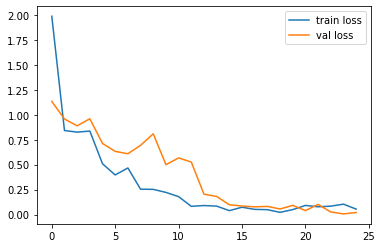

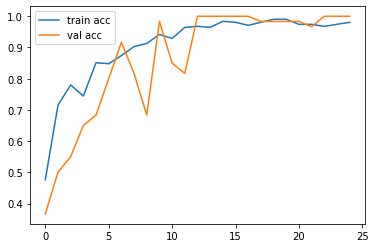

In [57]:
# loss
plt.plot(history13.history['loss'], label='train loss')
plt.plot(history13.history['val_loss'], label='val loss')
plt.legend()

plt.show()

# accuracies
plt.plot(history13.history['accuracy'], label='train acc')
plt.plot(history13.history['val_accuracy'], label='val acc')
plt.legend()

plt.show()



In [58]:
model13.evaluate(test_x,test_y,batch_size=32)

2/2 [==============================] - 0s 178ms/step - loss: 0.0207 - accuracy: 1.0000


[0.020668383687734604, 1.0]

In [59]:
y_pred13=model13.predict(test_x)
y_pred13=np.argmax(y_pred13,axis=1)

2/2 [==============================] - 0s 14ms/step


In [60]:
accuracy_score(y_pred13,test_y)

1.0

In [61]:
print(classification_report(y_pred13,test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [62]:
confusion_matrix(y_pred13,test_y)

array([[20,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 20]])

# cnn 20

In [63]:
def build_model20():
    
    '''Sequential Model creation'''
    model = Sequential()
    
    model.add(Conv2D(16,(3,3),padding='same',input_shape = (256,256,3),activation='relu'))
    model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    model.add(Conv2D(32,(3,3),padding='same',activation='relu'))    
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Dropout(0.25))
    model.add(Dense(32))
    model.add(Dropout(0.25))
    model.add(Dense(32))
    model.add(Dense(units = 3, activation = 'softmax'))
    
    return model

model20 = build_model20()
model20.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                  

In [64]:
# tell the model what cost and optimization method to use
model20.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [65]:
# fit the model
history20 = model20.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=25,
  #callbacks=[early_stop],
  batch_size=16,shuffle=True)

Epoch 1/25
20/20 [==============================] - 6s 178ms/step - loss: 1.1061 - accuracy: 0.3528 - val_loss: 1.0999 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 1s 72ms/step - loss: 1.0995 - accuracy: 0.3463 - val_loss: 1.0996 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 1s 69ms/step - loss: 1.1008 - accuracy: 0.3528 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 4/25
20/20 [==============================] - 1s 70ms/step - loss: 1.1010 - accuracy: 0.3495 - val_loss: 1.1007 - val_accuracy: 0.3333
Epoch 5/25
20/20 [==============================] - 1s 69ms/step - loss: 1.0989 - accuracy: 0.3495 - val_loss: 1.0994 - val_accuracy: 0.3333
Epoch 6/25
20/20 [==============================] - 1s 69ms/step - loss: 1.0985 - accuracy: 0.3495 - val_loss: 1.0993 - val_accuracy: 0.3333
Epoch 7/25
20/20 [==============================] - 1s 69ms/step - loss: 1.0981 - accuracy: 0.3528 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 8/25
2

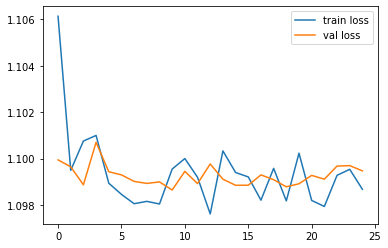

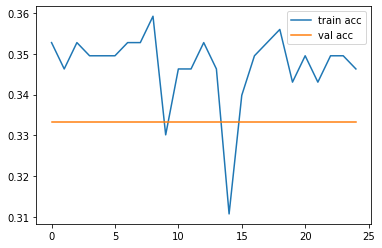

In [66]:
# loss
plt.plot(history20.history['loss'], label='train loss')
plt.plot(history20.history['val_loss'], label='val loss')
plt.legend()

plt.show()

# accuracies
plt.plot(history20.history['accuracy'], label='train acc')
plt.plot(history20.history['val_accuracy'], label='val acc')
plt.legend()

plt.show()

In [67]:
model20.evaluate(test_x,test_y,batch_size=32)

2/2 [==============================] - 1s 589ms/step - loss: 1.0995 - accuracy: 0.3333


[1.099468469619751, 0.3333333432674408]

In [68]:
y_pred20=model20.predict(test_x)
y_pred20=np.argmax(y_pred20,axis=1)

2/2 [==============================] - 0s 39ms/step


In [69]:
accuracy_score(y_pred20,test_y)

0.3333333333333333

In [70]:
print(classification_report(y_pred20,test_y))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        60
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.33        60
   macro avg       0.33      0.11      0.17        60
weighted avg       1.00      0.33      0.50        60



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
confusion_matrix(y_pred20,test_y)

array([[20, 20, 20],
       [ 0,  0,  0],
       [ 0,  0,  0]])